In [3]:
conda install -c anaconda py-xgboost

Solving environment: ...working... 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2019.03=py37_0
done

## Package Plan ##

  environment location: C:\Users\lilyx\Anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           9 KB  anaconda
    ca-certificates-2019.1.23  |                0         158 KB  anaconda
    certifi-2019.3.9           |           py37_0         155 KB  anaconda
    conda-4.6.14               |           py37_0         2.1 MB  anaconda
    libxgboost-0.80            |                0         3.6 MB  anaconda
    openssl-1.1.1              |       he774522_0         5.7 MB  anaconda
    py-xgboost-0.80            |           py37_0          67 KB  anaconda
 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
# import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import DataConversionWarning
from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import xgboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [658]:
df = pd.read_csv('Corn_Supply_&_Demand_30.csv', nrows=91)

In [659]:
df.isna().sum().sort_values(ascending=False)

Unnamed: 0                          91
Unnamed: 35                         91
Unnamed: 69                         91
Unnamed: 70                         91
Unnamed: 71                         91
 Corn Used for Ethanol              73
 Corn Used for Ethanol .1           73
Ethanol Usage % of Prod.            73
 Corn Used for Ethanol .2           73
Trend Yield                         67
Trend Yield.1                       67
Trend Yield.2                       67
Target Price                        66
Loan Rate                           66
Cash/Loan Rate (%).1                66
Loan Rate.1                         66
Target Price.1                      66
Target Price.2                      66
Loan Rate.2                         66
Cash/Loan Rate (%).2                66
Cash/Loan Rate (%)                  66
 Reserve .2                         64
 Reserve                            64
 Reserve .1                         64
 CCC .2                             57
 CCC .1                  

In [660]:
df = df.fillna(0)#done later
pd.set_option("display.max_rows", 999, "display.max_columns", 999)
df.shape

(91, 105)

In [661]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 69', 'Unnamed: 70', 'Unnamed: 71', 'Unnamed: 35'])

In [662]:
df.loc[60:65]

,Year,Year.1,Year.2,Planted Acres,Harvested Acres,Actual Yield,Production,Stocks,Imports,Total Supply,Seed,"Food, Alcohol & Industrial",Corn Used for Ethanol,Feed & Residual Usage,All Dom. Use,Exports,Total Usage,Ending Stocks,Free,Reserve,CCC,Loan,Stock/Use (%),Corn Avg Farm Price,SB Avg Farm Price,SB/Corn P Ratio,Target Price,Loan Rate,Cash/Loan Rate (%),Trend Yield,GDP99 Def,Ind & Alcohol Usage % of Prod.,Feed Usage % of Prod,Ethanol Usage % of Prod.,Year.3,Year.4,Year.5,Planted Acres .1,Harvested Acres .1,Actual Yield.1,Production .1,Stocks .1,Imports.1,Total Supply .1,Seed.1,"Food, Alcohol & Industrial .1",Corn Used for Ethanol .1,Feed & Residual Usage .1,All Dom. Use .1,Exports .1,Total Usage .1,Ending Stocks .1,Free .1,Reserve .1,CCC .1,Loan.1,Stock/Use (%).1,Corn Avg Farm Price.1,SB Avg Farm Price.1,SB/Corn P Ratio.1,Target Price.1,Loan Rate.1,Cash/Loan Rate (%).1,Trend Yield.1,GDP99 Def.1,Ind & Alcohol Usage % of Prod..1,Feed Usage % of Prod.1,Year.6,Year.7,Year.8,Planted Acres .2,Harvested Acres .2,Actual Yield.2,Production .2,Stocks .2,Imports.2,Total Supply .2,Seed.2,"Food, Alcohol & Industrial .2",Corn Used for Ethanol .2,Feed & Residual Usage .2,All Dom. Use .2,Exports .2,Total Usage .2,Ending Stocks .2,Free .2,Reserve .2,CCC .2,Loan.2,Stock/Use (%).2,Corn Avg Farm Price.2,SB Avg Farm Price.2,SB/Corn P Ratio.2,Target Price.2,Loan Rate.2,Cash/Loan Rate (%).2,Trend Yield.2,GDP99 Def.2,Ind & Alcohol Usage % of Prod..2,Feed Usage % of Prod.2
60,1989,89,89,"72,322","64,783",116.3,"7,532","1,930",2.0,"9,464",19.0,"1,337",0,"4,389","5,745","2,368","8,113","1,351",619,387,233,112,0.167,$2.36,$5.69,2.41,$2.84,$1.65,143%,0.0,80.1,18%,58%,0,1989,89,89,"72,322","64,783",116.3,"7,532","1,930",2.0,"9,464",19.0,"1,337",0,"4,389","5,745","2,368","8,113","1,351",619,387,233,112,0.167,$2.36,$5.69,2.41,$2.84,$1.65,143%,0.0,80.1,18%,58%,1989,89,89,"72,322","64,783",116.3,"7,532","1,930",2.0,"9,464",19.0,"1,337",0,"4,389","5,745","2,368","8,113","1,351",619,387,233,112,0.167,$2.36,$5.69,2.41,$2.84,$1.65,143%,0.0,80.1,18%,58%
61,1990,90,90,"74,166","66,952",118.5,"7,934","1,344",3.0,"9,281",19.0,"1,354",0,"4,663","6,036","1,725","7,761","1,520",937,3,371,209,0.196,$2.28,$5.74,2.52,$2.75,$1.57,145%,0.0,83.2,17%,59%,0,1990,90,90,"74,166","66,952",118.5,"7,934","1,344",3.0,"9,281",19.0,"1,354",0,"4,663","6,036","1,725","7,761","1,520",937,3,371,209,0.196,$2.28,$5.74,2.52,$2.75,$1.57,145%,0.0,83.2,17%,59%,1990,90,90,"74,166","66,952",118.5,"7,934","1,344",3.0,"9,281",19.0,"1,354",0,"4,663","6,036","1,725","7,761","1,520",937,3,371,209,0.196,$2.28,$5.74,2.52,$2.75,$1.57,145%,0.0,83.2,17%,59%
62,1991,91,91,"75,957","68,822",108.6,"7,475","1,521",20.0,"9,016",20.0,"1,434",0,"4,878","6,332","1,584","7,916","1,100",791,-,113,196,0.139,$2.37,$5.58,2.35,$2.75,$1.62,146%,0.0,86.0,19%,65%,0,1991,91,91,"75,957","68,822",108.6,"7,475","1,521",20.0,"9,016",20.0,"1,434",0,"4,878","6,332","1,584","7,916","1,100",791,-,113,196,0.139,$2.37,$5.58,2.35,$2.75,$1.62,146%,0.0,86.0,19%,65%,1991,91,91,"75,957","68,822",108.6,"7,475","1,521",20.0,"9,016",20.0,"1,434",0,"4,878","6,332","1,584","7,916","1,100",791,-,113,196,0.139,$2.37,$5.58,2.35,$2.75,$1.62,146%,0.0,86.0,19%,65%
63,1992,92,92,"79,311","72,077",131.5,"9,477","1,100",7.0,"10,584",19.0,"1,492",0,"5,301","6,812","1,663","8,475","2,109","1,347",13,56,693,0.249,$2.07,$5.56,2.69,$2.75,$1.72,120%,0.0,87.9,16%,56%,0,1992,92,92,"79,311","72,077",131.5,"9,477","1,100",7.0,"10,584",19.0,"1,492",0,"5,301","6,812","1,663","8,475","2,109","1,347",13,56,693,0.249,$2.07,$5.56,2.69,$2.75,$1.72,120%,0.0,87.9,16%,56%,1992,92,92,"79,311","72,077",131.5,"9,477","1,100",7.0,"10,584",19.0,"1,492",0,"5,301","6,812","1,663","8,475","2,109","1,347",13,56,693,0.249,$2.07,$5.56,2.69,$2.75,$1.72,120%,0.0,87.9,16%,56%
64,1993,93,93,"73,235","62,921",100.7,"6,336","2,113",21.0,"8,470",21.0,"1,567",0,"4,704","6,292","1,328","7,620",850,609,119,45,77,0.112,$2.50,$6.40,2.56,$2.75,$1.72,145%,0.0,90.2,25%,74%,0,1993,93,93,"73,235","

In [663]:
minmax = df[df['Year'] > .01]#select dataframe where column 'Year' is nonzero
minmax = minmax.describe()
minmax.loc[['min','max']]

,Year,Year.1,Year.2,Actual Yield,Imports,Seed,Stock/Use (%),SB/Corn P Ratio,Trend Yield,GDP99 Def,Year.3,Year.4,Year.5,Actual Yield.1,Imports.1,Seed.1,Stock/Use (%).1,SB/Corn P Ratio.1,Trend Yield.1,GDP99 Def.1,Year.6,Year.7,Year.8,Actual Yield.2,Imports.2,Seed.2,Stock/Use (%).2,SB/Corn P Ratio.2,Trend Yield.2,GDP99 Def.2
min,1929.0,29.0,0.0,15.7,0.0,0.0,0.000,0.00,0.0,0.0,1929.0,29.0,0.0,15.7,0.0,0.0,0.000,0.00,0.0,0.0,1929.0,29.0,0.0,15.7,0.0,0.0,0.000,0.00,0.0,0.0
max,2019.0,119.0,99.0,176.6,160.0,22.0,0.661,3.19,182.7,100.0,2019.0,119.0,99.0,176.6,160.0,22.0,0.661,3.19,182.7,100.0,2019.0,119.0,99.0,176.6,160.0,22.0,0.661,3.19,182.7,100.0


In [664]:
df.loc[df['Year']==1929]

,Year,Year.1,Year.2,Planted Acres,Harvested Acres,Actual Yield,Production,Stocks,Imports,Total Supply,Seed,"Food, Alcohol & Industrial",Corn Used for Ethanol,Feed & Residual Usage,All Dom. Use,Exports,Total Usage,Ending Stocks,Free,Reserve,CCC,Loan,Stock/Use (%),Corn Avg Farm Price,SB Avg Farm Price,SB/Corn P Ratio,Target Price,Loan Rate,Cash/Loan Rate (%),Trend Yield,GDP99 Def,Ind & Alcohol Usage % of Prod.,Feed Usage % of Prod,Ethanol Usage % of Prod.,Year.3,Year.4,Year.5,Planted Acres .1,Harvested Acres .1,Actual Yield.1,Production .1,Stocks .1,Imports.1,Total Supply .1,Seed.1,"Food, Alcohol & Industrial .1",Corn Used for Ethanol .1,Feed & Residual Usage .1,All Dom. Use .1,Exports .1,Total Usage .1,Ending Stocks .1,Free .1,Reserve .1,CCC .1,Loan.1,Stock/Use (%).1,Corn Avg Farm Price.1,SB Avg Farm Price.1,SB/Corn P Ratio.1,Target Price.1,Loan Rate.1,Cash/Loan Rate (%).1,Trend Yield.1,GDP99 Def.1,Ind & Alcohol Usage % of Prod..1,Feed Usage % of Prod.1,Year.6,Year.7,Year.8,Planted Acres .2,Harvested Acres .2,Actual Yield.2,Production .2,Stocks .2,Imports.2,Total Supply .2,Seed.2,"Food, Alcohol & Industrial .2",Corn Used for Ethanol .2,Feed & Residual Usage .2,All Dom. Use .2,Exports .2,Total Usage .2,Ending Stocks .2,Free .2,Reserve .2,CCC .2,Loan.2,Stock/Use (%).2,Corn Avg Farm Price.2,SB Avg Farm Price.2,SB/Corn P Ratio.2,Target Price.2,Loan Rate.2,Cash/Loan Rate (%).2,Trend Yield.2,GDP99 Def.2,Ind & Alcohol Usage % of Prod..2,Feed Usage % of Prod.2
0,1929,29,29,"99,130","97,805",25.7,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,$0.80,0,0.0,0,0,0,0.0,0.0,0,0,0,1929,29,29,"99,130","97,805",25.7,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,$0.80,0,0.0,0,0,0,0.0,0.0,0,0,1929,29,29,"99,130","97,805",25.7,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,$0.80,0,0.0,0,0,0,0.0,0.0,0,0


In [665]:
df.columns.tolist()

['Year',
 'Year.1',
 'Year.2',
 ' Planted Acres ',
 ' Harvested Acres ',
 'Actual Yield',
 ' Production ',
 ' Stocks ',
 'Imports',
 ' Total Supply ',
 'Seed',
 ' Food, Alcohol & Industrial ',
 ' Corn Used for Ethanol ',
 ' Feed & Residual Usage ',
 ' All Dom. Use ',
 ' Exports ',
 ' Total Usage ',
 ' Ending Stocks ',
 ' Free ',
 ' Reserve ',
 ' CCC ',
 'Loan',
 'Stock/Use (%)',
 'Corn Avg Farm Price',
 'SB Avg Farm Price',
 'SB/Corn P Ratio',
 'Target Price',
 'Loan Rate',
 'Cash/Loan Rate (%)',
 'Trend Yield',
 'GDP99 Def',
 'Ind & Alcohol Usage % of Prod.',
 'Feed Usage % of Prod',
 'Ethanol Usage % of Prod.',
 'Year.3',
 'Year.4',
 'Year.5',
 ' Planted Acres .1',
 ' Harvested Acres .1',
 'Actual Yield.1',
 ' Production .1',
 ' Stocks .1',
 'Imports.1',
 ' Total Supply .1',
 'Seed.1',
 ' Food, Alcohol & Industrial .1',
 ' Corn Used for Ethanol .1',
 ' Feed & Residual Usage .1',
 ' All Dom. Use .1',
 ' Exports .1',
 ' Total Usage .1',
 ' Ending Stocks .1',
 ' Free .1',
 ' Reserve .1'

In [666]:
df.columns = df.columns.str.replace(' ', '')
df.columns.tolist()

['Year',
 'Year.1',
 'Year.2',
 'PlantedAcres',
 'HarvestedAcres',
 'ActualYield',
 'Production',
 'Stocks',
 'Imports',
 'TotalSupply',
 'Seed',
 'Food,Alcohol&Industrial',
 'CornUsedforEthanol',
 'Feed&ResidualUsage',
 'AllDom.Use',
 'Exports',
 'TotalUsage',
 'EndingStocks',
 'Free',
 'Reserve',
 'CCC',
 'Loan',
 'Stock/Use(%)',
 'CornAvgFarmPrice',
 'SBAvgFarmPrice',
 'SB/CornPRatio',
 'TargetPrice',
 'LoanRate',
 'Cash/LoanRate(%)',
 'TrendYield',
 'GDP99Def',
 'Ind&AlcoholUsage%ofProd.',
 'FeedUsage%ofProd',
 'EthanolUsage%ofProd.',
 'Year.3',
 'Year.4',
 'Year.5',
 'PlantedAcres.1',
 'HarvestedAcres.1',
 'ActualYield.1',
 'Production.1',
 'Stocks.1',
 'Imports.1',
 'TotalSupply.1',
 'Seed.1',
 'Food,Alcohol&Industrial.1',
 'CornUsedforEthanol.1',
 'Feed&ResidualUsage.1',
 'AllDom.Use.1',
 'Exports.1',
 'TotalUsage.1',
 'EndingStocks.1',
 'Free.1',
 'Reserve.1',
 'CCC.1',
 'Loan.1',
 'Stock/Use(%).1',
 'CornAvgFarmPrice.1',
 'SBAvgFarmPrice.1',
 'SB/CornPRatio.1',
 'TargetPrice.1

In [667]:
df.loc[df['Year']==1986, ['Free']]

,Free
57,(160)


In [668]:
df.loc[df['Year']==1985, ['Free']]

,Free
56,193


In [669]:
df.select_dtypes(exclude='number').columns.tolist()

['PlantedAcres',
 'HarvestedAcres',
 'Production',
 'Stocks',
 'TotalSupply',
 'Food,Alcohol&Industrial',
 'CornUsedforEthanol',
 'Feed&ResidualUsage',
 'AllDom.Use',
 'Exports',
 'TotalUsage',
 'EndingStocks',
 'Free',
 'Reserve',
 'CCC',
 'Loan',
 'CornAvgFarmPrice',
 'SBAvgFarmPrice',
 'TargetPrice',
 'LoanRate',
 'Cash/LoanRate(%)',
 'Ind&AlcoholUsage%ofProd.',
 'FeedUsage%ofProd',
 'EthanolUsage%ofProd.',
 'PlantedAcres.1',
 'HarvestedAcres.1',
 'Production.1',
 'Stocks.1',
 'TotalSupply.1',
 'Food,Alcohol&Industrial.1',
 'CornUsedforEthanol.1',
 'Feed&ResidualUsage.1',
 'AllDom.Use.1',
 'Exports.1',
 'TotalUsage.1',
 'EndingStocks.1',
 'Free.1',
 'Reserve.1',
 'CCC.1',
 'Loan.1',
 'CornAvgFarmPrice.1',
 'SBAvgFarmPrice.1',
 'TargetPrice.1',
 'LoanRate.1',
 'Cash/LoanRate(%).1',
 'Ind&AlcoholUsage%ofProd..1',
 'FeedUsage%ofProd.1',
 'PlantedAcres.2',
 'HarvestedAcres.2',
 'Production.2',
 'Stocks.2',
 'TotalSupply.2',
 'Food,Alcohol&Industrial.2',
 'CornUsedforEthanol.2',
 'Feed&R

In [670]:
df.iloc[66]['Reserve.2']

'  -   '

In [674]:
def trim_all_columns(df):
    trim_dollar = lambda x: x.strip('$') if type(x) is str else x
    return df.applymap(trim_dollar)

def trim_all_columns2(df):
    trim_percent = lambda x: x.strip('%') if type(x) is str else x
    return df.applymap(trim_percent)

def trim_all_columns3(df):
    trim_par1 = lambda x: x.strip('(') if type(x) is str else x
    return df.applymap(trim_par1)

def trim_all_columns4(df):
    trim_par2 = lambda x: x.strip(')') if type(x) is str else x
    return df.applymap(trim_par2)

def trim_all_columns5(df):
    trim_dash = lambda x: x.replace('-', '0') if type(x) is str else x
    return df.applymap(trim_dash)

def trim_all_columns6(df):
    trim_strings = lambda x: x.strip() if type(x) is str else x
    return df.applymap(trim_strings)

def trim_all_columns7(df):
    trim_comma = lambda x: x.replace(',', '') if type(x) is str else x
    return df.applymap(trim_comma)



# simple example of trimming whitespace from data elements
df = trim_all_columns(df)
df = trim_all_columns2(df)
df = trim_all_columns3(df)
df = trim_all_columns4(df)
df = trim_all_columns5(df)
df = trim_all_columns6(df)
df = trim_all_columns7(df)
df

,Year,Year.1,Year.2,PlantedAcres,HarvestedAcres,ActualYield,Production,Stocks,Imports,TotalSupply,Seed,"Food,Alcohol&Industrial",CornUsedforEthanol,Feed&ResidualUsage,AllDom.Use,Exports,TotalUsage,EndingStocks,Free,Reserve,CCC,Loan,Stock/Use(%),CornAvgFarmPrice,SBAvgFarmPrice,SB/CornPRatio,TargetPrice,LoanRate,Cash/LoanRate(%),TrendYield,GDP99Def,Ind&AlcoholUsage%ofProd.,FeedUsage%ofProd,EthanolUsage%ofProd.,Year.3,Year.4,Year.5,PlantedAcres.1,HarvestedAcres.1,ActualYield.1,Production.1,Stocks.1,Imports.1,TotalSupply.1,Seed.1,"Food,Alcohol&Industrial.1",CornUsedforEthanol.1,Feed&ResidualUsage.1,AllDom.Use.1,Exports.1,TotalUsage.1,EndingStocks.1,Free.1,Reserve.1,CCC.1,Loan.1,Stock/Use(%).1,CornAvgFarmPrice.1,SBAvgFarmPrice.1,SB/CornPRatio.1,TargetPrice.1,LoanRate.1,Cash/LoanRate(%).1,TrendYield.1,GDP99Def.1,Ind&AlcoholUsage%ofProd..1,FeedUsage%ofProd.1,Year.6,Year.7,Year.8,PlantedAcres.2,HarvestedAcres.2,ActualYield.2,Production.2,Stocks.2,Imports.2,TotalSupply.2,Seed.2,"Food,Alcohol&Industrial.2",CornUsedforEthanol.2,Feed&ResidualUsage.2,AllDom.Use.2,Exports.2,TotalUsage.2,EndingStocks.2,Free.2,Reserve.2,CCC.2,Loan.2,Stock/Use(%).2,CornAvgFarmPrice.2,SBAvgFarmPrice.2,SB/CornPRatio.2,TargetPrice.2,LoanRate.2,Cash/LoanRate(%).2,TrendYield.2,GDP99Def.2,Ind&AlcoholUsage%ofProd..2,FeedUsage%ofProd.2
0,1929,29,29,99130,97805,25.7,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.80,0,0.00,0,0,0,0.0,0.0,0,0,0,1929,29,29,99130,97805,25.7,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.80,0,0.00,0,0,0,0.0,0.0,0,0,1929,29,29,99130,97805,25.7,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.80,0,0.00,0,0,0,0.0,0.0,0,0
1,1930,30,30,103915,101465,20.5,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.60,0,0.00,0,0,0,0.0,0.0,0,0,0,1930,30,30,103915,101465,20.5,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.60,0,0.00,0,0,0,0.0,0.0,0,0,1930,30,30,103915,101465,20.5,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.60,0,0.00,0,0,0,0.0,0.0,0,0
2,1931,31,31,109364,106866,24.1,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.32,0,0.00,0,0,0,0.0,0.0,0,0,0,1931,31,31,109364,106866,24.1,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.32,0,0.00,0,0,0,0.0,0.0,0,0,1931,31,31,109364,106866,24.1,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.32,0,0.00,0,0,0,0.0,0.0,0,0
3,1932,32,32,113024,110577,26.5,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.32,0,0.00,0,0,0,0.0,0.0,0,0,0,1932,32,32,113024,110577,26.5,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.32,0,0.00,0,0,0,0.0,0.0,0,0,1932,32,32,113024,110577,26.5,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.32,0,0.00,0,0,0,0.0,0.0,0,0
4,1933,33,33,109830,105918,22.6,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.52,0,0.00,0,0,0,0.0,0.0,0,0,0,1933,33,33,109830,105918,22.6,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.52,0,0.00,0,0,0,0.0,0.0,0,0,1933,33,33,109830,105918,22.6,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.52,0,0.00,0,0,0,0.0,0.0,0,0
5,1934,34,34,100563,92193,15.7,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.82,0,0.00,0,0,0,0.0,0.0,0,0,0,1934,34,34,100563,92193,15.7,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.82,0,0.00,0,0,0,0.0,0.0,0,0,1934,34,34,100563,92193,15.7,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.82,0,0.00,0,0,0,0.0,0.0,0,0
6,1935,35,35,99974,95974,24.0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.66,0,0.00,0,0,0,0.0,0.0,0,0,0,1935,35,35,99974,95974,24.0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.66,0,0.00,0,0,0,0.0,0.0,0,0,1935,35,35,99974,95974,24.0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.66,0,0.00,0,0,0,0.0,0.0,0,0
7,1936,36,36,101959,93154,16.2,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000,1.04,0,0.00,0,0,0,0.0,0.0,0,0,0,1936,36,36,101959,93154,16.2,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000,1.04,0,0.00,0,0,0,0.0,0.0,0,0,1936,36,36,101959,93154,16.2,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000,1.04,0,0.00,0,0,0,0.0,0.0,0,0
8,1937,37,37,97174,93930,28.1,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.52,0,0.00,0,0,0,0.0,0.0,0,0,0,1937,37,37,97174,93930,28.1,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.52,0,0.00,0,0,0,0.0,0.0,0,0,1937,37,37,97174,9

In [675]:
df.loc[df['Year']==1986, ['Free']]

,Free
57,160


In [678]:
df = df.astype(float)
df.dtypes

Year                          float64
Year.1                        float64
Year.2                        float64
PlantedAcres                  float64
HarvestedAcres                float64
ActualYield                   float64
Production                    float64
Stocks                        float64
Imports                       float64
TotalSupply                   float64
Seed                          float64
Food,Alcohol&Industrial       float64
CornUsedforEthanol            float64
Feed&ResidualUsage            float64
AllDom.Use                    float64
Exports                       float64
TotalUsage                    float64
EndingStocks                  float64
Free                          float64
Reserve                       float64
CCC                           float64
Loan                          float64
Stock/Use(%)                  float64
CornAvgFarmPrice              float64
SBAvgFarmPrice                float64
SB/CornPRatio                 float64
TargetPrice 

In [681]:
# pd.crosstab(df["Year"], df["CornAvgFarmPrice"],margins=True)

CornAvgFarmPrice,0.32,0.49,0.52,0.57,0.6,0.62,0.66,0.75,0.8,0.82,0.92,1.0,1.03,1.04,1.08,1.09,1.1,1.11,1.12,1.16,1.17,1.24,1.27,1.29,1.3,1.33,1.35,1.43,1.48,1.5,1.52,1.56,1.57,1.66,1.82,1.85,1.94,1.97,2.0,2.05,2.06,2.07,2.15,2.16,2.23,2.25,2.26,2.28,2.32,2.36,2.37,2.42,2.43,2.47,2.48,2.5,2.54,2.55,2.63,2.71,3.02,3.04,3.12,3.21,3.24,3.3,3.36,3.5,3.55,3.61,3.7,4.08,4.2,4.46,5.18,6.22,6.89,All
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1929.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1930.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1931.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1932.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1933.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1934.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1935.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1936.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1937.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


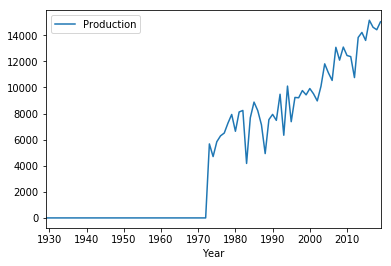

In [685]:
df.plot.line(x='Year', y='Production')

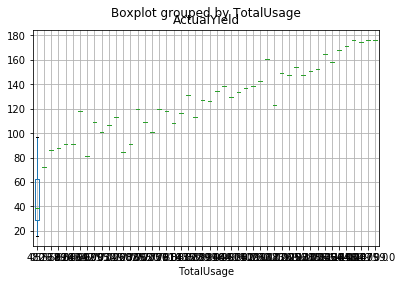

In [691]:
df.boxplot(column='ActualYield',by='TotalUsage')

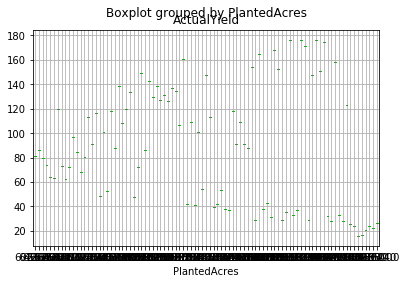

In [694]:
df.boxplot(column='ActualYield',by='PlantedAcres')